In [475]:
import numpy as np
import pandas as pd
import sklearn

##Load IRIS datasets

In [476]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
from sklearn.model_selection import train_test_split
#print(iris.DESCR)

In [477]:
type(iris)

sklearn.utils.Bunch

## Linear Classification


### Split dataset 
training--> 40

testing-->10


In [478]:
iris
iris_d=pd.Series(iris)
iris_df=pd.DataFrame(iris_d.data,columns=iris.feature_names)
iris_df["target"]=pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [479]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [480]:
iris_df.shape

(150, 5)

In [481]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [482]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

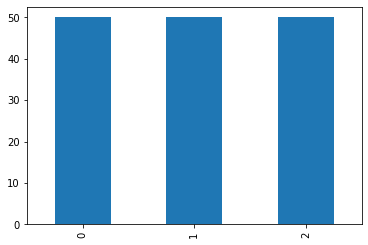

In [483]:
iris_df['target'].value_counts().plot(kind='bar')

In [484]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [485]:
iris_df.duplicated().sum()

1

In [486]:
#iris_df.drop_duplicates(inplace=True)
iris_df.duplicated().sum()


1

### Make Z for all feature


In [487]:
#I =np.ones((iris_df.shape[0],1))  #create 1-d ones 

In [488]:
#z=iris_df.insert(loc=0,column='class',value=I)

In [489]:
#iris_df=iris_df.drop(labels="class",axis=1)
#iris_df["class"]=pd.Series(np.ones((1,iris_df.shape[0]))[0])
z=iris_df.copy(deep=True)
# zr=z.sample(frac=1).reset_index(drop=True)   #to randamize 
# zr
# z1=np.array(z)
# z1

In [490]:
ones=np.ones((1,z.shape[0]))[0]
z.insert(loc=0,column="class", value=ones)

In [570]:
t=z['target']

In [571]:
z_np=np.array(z)

In [572]:
# for i in range(len(t)):
#   if t[i]!=0:
#     z_np[i]*=-1

In [573]:
z_np=z_np[:,:7]
z_np

array([[1. , 5.1, 3.5, 1.4, 0.2, 0. ],
       [1. , 4.9, 3. , 1.4, 0.2, 0. ],
       [1. , 4.7, 3.2, 1.3, 0.2, 0. ],
       [1. , 4.6, 3.1, 1.5, 0.2, 0. ],
       [1. , 5. , 3.6, 1.4, 0.2, 0. ],
       [1. , 5.4, 3.9, 1.7, 0.4, 0. ],
       [1. , 4.6, 3.4, 1.4, 0.3, 0. ],
       [1. , 5. , 3.4, 1.5, 0.2, 0. ],
       [1. , 4.4, 2.9, 1.4, 0.2, 0. ],
       [1. , 4.9, 3.1, 1.5, 0.1, 0. ],
       [1. , 5.4, 3.7, 1.5, 0.2, 0. ],
       [1. , 4.8, 3.4, 1.6, 0.2, 0. ],
       [1. , 4.8, 3. , 1.4, 0.1, 0. ],
       [1. , 4.3, 3. , 1.1, 0.1, 0. ],
       [1. , 5.8, 4. , 1.2, 0.2, 0. ],
       [1. , 5.7, 4.4, 1.5, 0.4, 0. ],
       [1. , 5.4, 3.9, 1.3, 0.4, 0. ],
       [1. , 5.1, 3.5, 1.4, 0.3, 0. ],
       [1. , 5.7, 3.8, 1.7, 0.3, 0. ],
       [1. , 5.1, 3.8, 1.5, 0.3, 0. ],
       [1. , 5.4, 3.4, 1.7, 0.2, 0. ],
       [1. , 5.1, 3.7, 1.5, 0.4, 0. ],
       [1. , 4.6, 3.6, 1. , 0.2, 0. ],
       [1. , 5.1, 3.3, 1.7, 0.5, 0. ],
       [1. , 4.8, 3.4, 1.9, 0.2, 0. ],
       [1. , 5. , 3. , 1.

In [495]:
# for i in range(len(z_np)):
#   if z_np[i][5]>0:
#     z_np[i][5]=-1
#   else:
#       z_np[i][5]=1
# z_np

In [579]:
df1=np.array(z_np[:50])
x=df1[:,:4]
y=df1[:,-1]
print(y)
for i in range(len(y)):
  if y[i]!=1:
    y[i]=-1
  else:
    y[i]=1
print(y)
x_train1,x_test1,y_train1,y_test1 = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=20)
x_train1


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


array([[1. , 5. , 3.5, 1.3],
       [1. , 5.1, 3.5, 1.4],
       [1. , 5.7, 3.8, 1.7],
       [1. , 5.1, 3.5, 1.4],
       [1. , 5.2, 3.5, 1.5],
       [1. , 5.5, 4.2, 1.4],
       [1. , 5.5, 3.5, 1.3],
       [1. , 4.4, 3.2, 1.3],
       [1. , 5.4, 3.7, 1.5],
       [1. , 4.6, 3.1, 1.5],
       [1. , 4.5, 2.3, 1.3],
       [1. , 4.3, 3. , 1.1],
       [1. , 5.1, 3.8, 1.6],
       [1. , 4.7, 3.2, 1.3],
       [1. , 4.4, 3. , 1.3],
       [1. , 5.1, 3.4, 1.5],
       [1. , 5.4, 3.9, 1.7],
       [1. , 5. , 3.5, 1.6],
       [1. , 4.9, 3.6, 1.4],
       [1. , 4.8, 3.1, 1.6],
       [1. , 4.6, 3.4, 1.4],
       [1. , 4.7, 3.2, 1.6],
       [1. , 5.4, 3.9, 1.3],
       [1. , 5.1, 3.8, 1.5],
       [1. , 5. , 3.3, 1.4],
       [1. , 5.1, 3.8, 1.9],
       [1. , 5.1, 3.7, 1.5],
       [1. , 5.2, 4.1, 1.5],
       [1. , 4.9, 3.1, 1.5],
       [1. , 5. , 3.4, 1.5],
       [1. , 4.6, 3.6, 1. ],
       [1. , 4.8, 3.4, 1.6],
       [1. , 5.4, 3.4, 1.7],
       [1. , 4.9, 3.1, 1.5],
       [1. , 5

In [580]:
df2=np.array(z_np[50:100])
x=df2[:,:4]
y=df2[:,-1]
print(y)
for i in range(len(y)):
  if y[i]!=1:
    y[i]=-1
  else:
    y[i]=1
print(y)
x_train2,x_test2,y_train2,y_test2 = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=20)
y_train2

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [581]:
df3=np.array(z_np[100:151])
x=df3[:,:4]
y=df3[:,-1]
print(y)
for i in range(len(y)):
  if y[i]!=1:
    y[i]=-1
  else:
    y[i]=1
x_train3,x_test3,y_train3,y_test3 = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=20)
y_train3

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2.]


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.])

###Calculate w
## w=(Z^T * Z)^-1 * Z^T * b


In [582]:
Z=np.vstack((x_train1, x_train2,x_train3))
b=np.hstack((y_train1, y_train2,y_train3))

# a=np.linalg.inv(np.matmul(Z.transpose(), Z))
# c=np.matmul(a,Z.transpose())
w1=np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.transpose(), Z)),Z.transpose()),b)
R1=np.matmul(x_test1,w1)
print(w1)
to_compare=[]
y_comp=[]
for i in range(len(R)):
  if R1[i]>0:
    to_compare.append(1)
  else:
    to_compare.append(-1)

for i in range(len(R)):
  if y_test1[i]>0:
    y_comp.append(1)
  else:
    y_comp.append(-1)    

print((y_comp==to_compare))

[ 2.94742898e+00 -2.08898274e-03 -1.04837192e+00 -1.33109379e-02]
True


In [583]:
Z=np.vstack((x_train1, x_train2,x_train3))
b=np.hstack((y_train1, y_train2,y_train3))

# a=np.linalg.inv(np.matmul(Z.transpose(), Z))
# c=np.matmul(a,Z.transpose())
w2=np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.transpose(), Z)),Z.transpose()),b)
R2=np.matmul(x_test2,w2)
print(w2)
to_compare=[]
y_comp=[]
for i in range(len(R2)):
  if R2[i]>0:
    to_compare.append(1)
  else:
    to_compare.append(-1)

for i in range(len(R2)):
  if y_test2[i]>0:
    y_comp.append(1)
  else:
    y_comp.append(-1)    
print(y_comp)
print(to_compare)
print((y_comp==to_compare))

[ 2.94742898e+00 -2.08898274e-03 -1.04837192e+00 -1.33109379e-02]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
False


In [584]:
Z=np.vstack((x_train1, x_train2,x_train3))
b=np.hstack((y_train1, y_train2,y_train3))

# a=np.linalg.inv(np.matmul(Z.transpose(), Z))
# c=np.matmul(a,Z.transpose())
w3=np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.transpose(), Z)),Z.transpose()),b)
R3=np.matmul(x_test3,w3)
print(w3)
to_compare=[]
y_comp=[]
for i in range(len(R3)):
  if R3[i]>0:
    to_compare.append(1)
  else:
    to_compare.append(-1)

for i in range(len(R3)):
  if y_test3[i]>0:
    y_comp.append(1)
  else:
    y_comp.append(-1)    
print(y_comp)
print(to_compare)
print((y_comp==to_compare))

[ 2.94742898e+00 -2.08898274e-03 -1.04837192e+00 -1.33109379e-02]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 1, -1, 1, -1, -1, -1, 1]
False


### One Vs All 
Build 3 model


##w1, w2 , w3



Evaluation

Class #1
if w1^T * x  > 0
and w2^T * x < 0
and w3^T * x < 0

Class #2
if w1^T * x  < 0
and w2^T * x > 0
and w3^T * x < 0

Class #3
if w1^T * x  < 0
and w2^T * x < 0
and w3^T * x > 0

Undefine Class
if
 w1^T * x    > 0 and w2^T * x > 0 and w3^T * x < 0

OR

w1^T * x    < 0 and w2^T * x > 0 and w3^T * x > 0

OR

w1^T * x    > 0 and w2^T * x < 0 and w3^T * x > 0
